In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from statsmodels.tsa.ar_model import AR, ARResults

In [2]:
data_path = 'C:\\Users\\mehedee\\Documents\\data\\office_projects\\product_count_prediction\\tenpo01\\poduct_sale\\'
file = 'sale_4538151297025.csv'

In [3]:
df = pd.read_csv(data_path+file,index_col='date',parse_dates=True)

In [4]:
df.asfreq('D')

,count,money
date,,
2016-07-21,3.0,594.0
2016-07-22,17.0,3366.0
2016-07-23,199.0,18126.0
2016-07-24,19.0,3762.0
2016-07-25,14.0,2772.0
...,...,...
2020-04-25,218.0,25724.0
2020-04-26,35.0,6580.0
2020-04-27,49.0,9212.0


In [5]:
str(df.index[0]),str(df.index[-1])

('2016-07-21 00:00:00', '2020-04-29 00:00:00')

In [6]:
import pandas as pd

idx = pd.date_range(str(df.index[0]), str(df.index[-1]))

s = df
s.index = pd.DatetimeIndex(s.index)

s = s.reindex(idx, fill_value=0)
print(s)

            count  money
2016-07-21      3    594
2016-07-22     17   3366
2016-07-23    199  18126
2016-07-24     19   3762
2016-07-25     14   2772
...           ...    ...
2020-04-25    218  25724
2020-04-26     35   6580
2020-04-27     49   9212
2020-04-28    206  24308
2020-04-29     50   9400

[1379 rows x 2 columns]


In [7]:
s.index

DatetimeIndex(['2016-07-21', '2016-07-22', '2016-07-23', '2016-07-24',
               '2016-07-25', '2016-07-26', '2016-07-27', '2016-07-28',
               '2016-07-29', '2016-07-30',
               ...
               '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
               '2020-04-28', '2020-04-29'],
              dtype='datetime64[ns]', length=1379, freq='D')

In [8]:
df=s

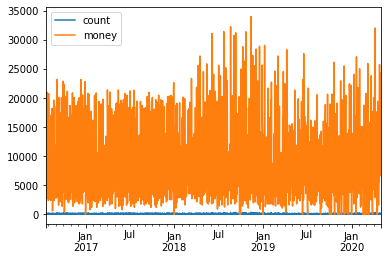

In [9]:
df.plot()

In [10]:
df.index.freq='D'

In [11]:
df.index 

DatetimeIndex(['2016-07-21', '2016-07-22', '2016-07-23', '2016-07-24',
               '2016-07-25', '2016-07-26', '2016-07-27', '2016-07-28',
               '2016-07-29', '2016-07-30',
               ...
               '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
               '2020-04-28', '2020-04-29'],
              dtype='datetime64[ns]', length=1379, freq='D')

In [12]:
df.dropna()

,count,money
2016-07-21,3,594
2016-07-22,17,3366
2016-07-23,199,18126
2016-07-24,19,3762
2016-07-25,14,2772
...,...,...
2020-04-25,218,25724
2020-04-26,35,6580
2020-04-27,49,9212
2020-04-28,206,24308


In [13]:
len(df)

1379

In [14]:
train = df[:1040]

In [15]:
test = df[1040:]

In [16]:
model = AR(train['count'])

In [17]:
ARfit = model.fit(ic='t-stat')

In [18]:
ARfit.params

const        67.638573
L1.count      0.058231
L2.count     -0.160389
L3.count     -0.028188
L4.count     -0.057152
L5.count     -0.042390
L6.count      0.005763
L7.count      0.164502
L8.count      0.013185
L9.count     -0.010315
L10.count     0.014931
L11.count     0.011041
L12.count    -0.004257
L13.count    -0.049024
L14.count     0.240339
L15.count    -0.128725
L16.count     0.022863
L17.count     0.019711
L18.count     0.055936
L19.count    -0.035331
L20.count    -0.055286
L21.count     0.221275
L22.count    -0.060677
dtype: float64

In [19]:
start = len(train)

In [20]:
end = len(test)+len(train)-1

In [21]:
start,end

(1040, 1378)

In [22]:
predictions8 = ARfit.predict(start,end)
predicitons8 = predictions8.rename('AR(8)')

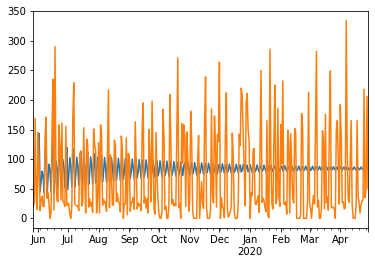

In [23]:
predicitons8.plot()
test['count'].plot()

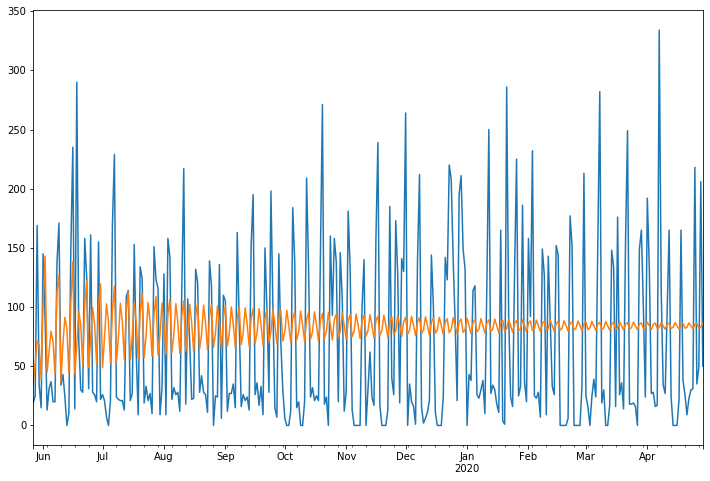

In [24]:
test['count'].plot(figsize=(12,8))
predicitons8.plot()

In [25]:
predictions8

2019-05-27    33.938612
2019-05-28    51.986525
2019-05-29    70.990248
2019-05-30    68.233410
2019-05-31    39.377977
                ...    
2020-04-25    85.204853
2020-04-26    86.163858
2020-04-27    82.168270
2020-04-28    83.018709
2020-04-29    86.533922
Freq: D, Length: 339, dtype: float64

In [26]:
for index,row in df.iterrows():
    if row['count'] == 0:
        print(row)

count    0
money    0
Name: 2017-01-01 00:00:00, dtype: int64
count    0
money    0
Name: 2018-01-01 00:00:00, dtype: int64
count    0
money    0
Name: 2018-09-27 00:00:00, dtype: int64
count    0
money    0
Name: 2018-10-01 00:00:00, dtype: int64
count    0
money    0
Name: 2019-01-01 00:00:00, dtype: int64
count    0
money    0
Name: 2019-06-13 00:00:00, dtype: int64
count    0
money    0
Name: 2019-07-04 00:00:00, dtype: int64
count    0
money    0
Name: 2019-08-26 00:00:00, dtype: int64
count    0
money    0
Name: 2019-10-02 00:00:00, dtype: int64
count    0
money    0
Name: 2019-10-03 00:00:00, dtype: int64
count    0
money    0
Name: 2019-10-09 00:00:00, dtype: int64
count    0
money    0
Name: 2019-10-10 00:00:00, dtype: int64
count    0
money    0
Name: 2019-10-23 00:00:00, dtype: int64
count    0
money    0
Name: 2019-11-05 00:00:00, dtype: int64
count    0
money    0
Name: 2019-11-06 00:00:00, dtype: int64
count    0
money    0
Name: 2019-11-07 00:00:00, dtype: int64
count   

In [27]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

In [34]:
s.index

DatetimeIndex(['2016-07-21', '2016-07-22', '2016-07-23', '2016-07-24',
               '2016-07-25', '2016-07-26', '2016-07-27', '2016-07-28',
               '2016-07-29', '2016-07-30',
               ...
               '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
               '2020-04-28', '2020-04-29'],
              dtype='datetime64[ns]', length=1379, freq='D')

In [43]:
df.index.asfreq='M'

In [46]:
# df.index.freq='M'

In [45]:
dfm = df['count'].resample(rule='M').mean()

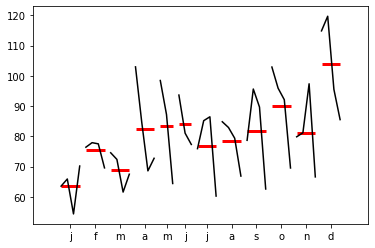

In [48]:
month_plot(dfm);